# Time series forecasting with ARIMA

In [8]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape
from IPython.display import Image

%matplotlib inline
pd.options.display.float_format = '{:,.2}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [9]:
energy = load_data('./data')[['load']]
energy.head(10)

,load
2012-01-01 00:00:00,2.7e+03
2012-01-01 01:00:00,2.6e+03
2012-01-01 02:00:00,2.4e+03
2012-01-01 03:00:00,2.4e+03
2012-01-01 04:00:00,2.4e+03
2012-01-01 05:00:00,2.5e+03
2012-01-01 06:00:00,2.6e+03
2012-01-01 07:00:00,2.7e+03
2012-01-01 08:00:00,2.9e+03
2012-01-01 09:00:00,3.1e+03


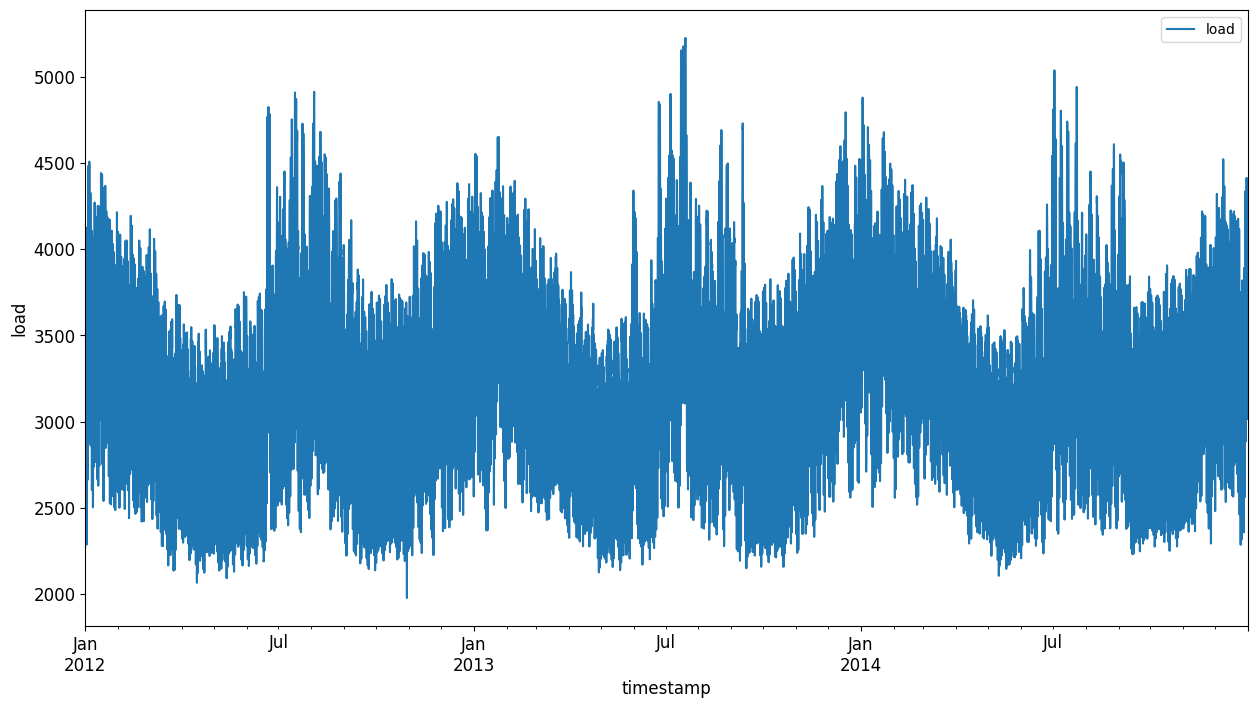

In [10]:
# plot the available energy data from Janurary 2012 to December 2014
energy.plot(y='load', subplots=True, figsize=(15,8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

## Create training and testing datasets
You need to ensure that the test set covers a later period in time from the training set to ensure that the model does not gain information from future time periods.